In [28]:
import warnings
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import category_encoders as ce
import seaborn as sns  
%matplotlib inline


warnings.filterwarnings('ignore')


In [26]:
df = pd.read_csv('../../data/drug200.csv')

In [27]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['BP'].unique()


array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [10]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [31]:
# Label encoder for BP
# NONE --> 0
# LOW --> 1
# NORMAL --> 2
# HIGH --> 3
# Dan lain - lain

encoder_BP = ce.OrdinalEncoder(cols=['BP'], return_df=True,
mapping = [{'col':'BP', 'mapping':{'None':0,'LOW':1,'NORMAL':2, 'HIGH': 3}}])

# Label encoder for Cholesterol
encoder_Cholesterol = ce.OrdinalEncoder(cols=['Cholesterol'],return_df=True,
                           mapping=[{'col':'Cholesterol',
                                    'mapping':{'NORMAL':1,'HIGH':2}}])

# Label Sex
encoder_Sex = ce.OrdinalEncoder(cols=['Sex'],return_df=True,
                           mapping=[{'col':'Sex',
                                    'mapping':{'F':1,'M':2}}])

df = encoder_BP.fit_transform(df)

df = encoder_Cholesterol.fit_transform(df)

df = encoder_Sex.fit_transform(df)

df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,2,25.355,DrugY
1,47,2,1,2,13.093,drugC
2,47,2,1,2,10.114,drugC
3,28,1,2,2,7.798,drugX
4,61,1,1,2,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,1,2,11.567,drugC
196,16,2,1,2,12.006,drugC
197,52,2,2,2,9.894,drugX
198,23,2,2,1,14.020,drugX


In [32]:
# Split data training dan testing (7:3)

from sklearn.model_selection import train_test_split


# Memisahkan Atribut dan label
X = df.drop('Drug', axis=1)
y = df['Drug']

# melakukan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [33]:
from sklearn.preprocessing import MinMaxScaler
cols = X_train.columns


scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [34]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()


,Age,Sex,BP,Cholesterol,Na_to_K
count,140.000000,140.00000,140.000000,140.000000,140.000000
mean,0.515133,0.55000,0.546429,0.535714,0.298946
std,0.278649,0.49928,0.423655,0.500514,0.218561
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.288136,0.00000,0.000000,0.000000,0.130238
50%,0.542373,1.00000,0.500000,1.000000,0.233661
75%,0.728814,1.00000,1.000000,1.000000,0.399282
max,1.000000,1.00000,1.000000,1.000000,1.000000


### SVM RBL Kernel

In [35]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


#### C=1.0 , kernel = rbf

In [36]:
# instantiate classifier with default hyperparameters
svc = SVC(kernel='rbf', C=1.0)


# fit classifier to training set
svc.fit(X_train, y_train)


# make predictions on test set
y_pred = svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8667


#### C = 100, kernel = rbf

In [37]:
svc = SVC(kernel='rbf', C=100.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8833


### SVM Linear Kernel


#### C = 1, kernel = linear

In [38]:
svc = SVC(kernel='linear', C=1.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9333


#### C = 100, kernel = linear

In [39]:
svc = SVC(kernel='linear', C=100.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9833


#### C = 1000, kernel = linear

In [40]:
svc = SVC(kernel='linear', C=1000.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 1.0000


### SVM Polynomial Kernel

#### C = 1, kernel = poly

In [41]:
svc = SVC(kernel='poly', C=1.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9167


#### C = 100, kernel = poly

In [42]:
svc = SVC(kernel='poly', C=100.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9167


### SVM RBL Sigmoid

#### C = 1, kernel=sigmoid

In [43]:
svc = SVC(kernel='sigmoid', C=1.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.4833


#### C = 100, kernel=sigmoid

In [44]:
svc = SVC(kernel='sigmoid', C=100.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.4167


### Confussion Matrix

In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20  3  1  1  5]
 [ 1  1  1  0  2]
 [ 1  1  0  0  1]
 [ 0  0  0  1  3]
 [ 8  2  5  0  3]]

True Positives(TP) =  20

True Negatives(TN) =  1

False Positives(FP) =  3

False Negatives(FN) =  1


Text(95.72222222222221, 0.5, 'Truth')

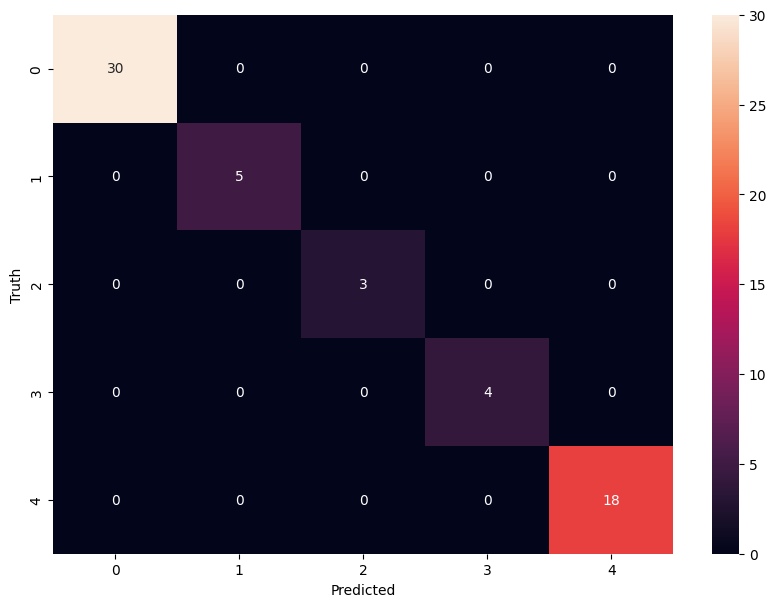

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

svc = SVC(kernel='linear', C=1000.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [53]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 1.0000


In [54]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0000


In [55]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))


Precision : 1.0000


### Kesimpulan
> Berdasarkan SVM, nilai akurasi maksimal terdapat pada kernel linear dengan c=1000.0 yaitu 100%